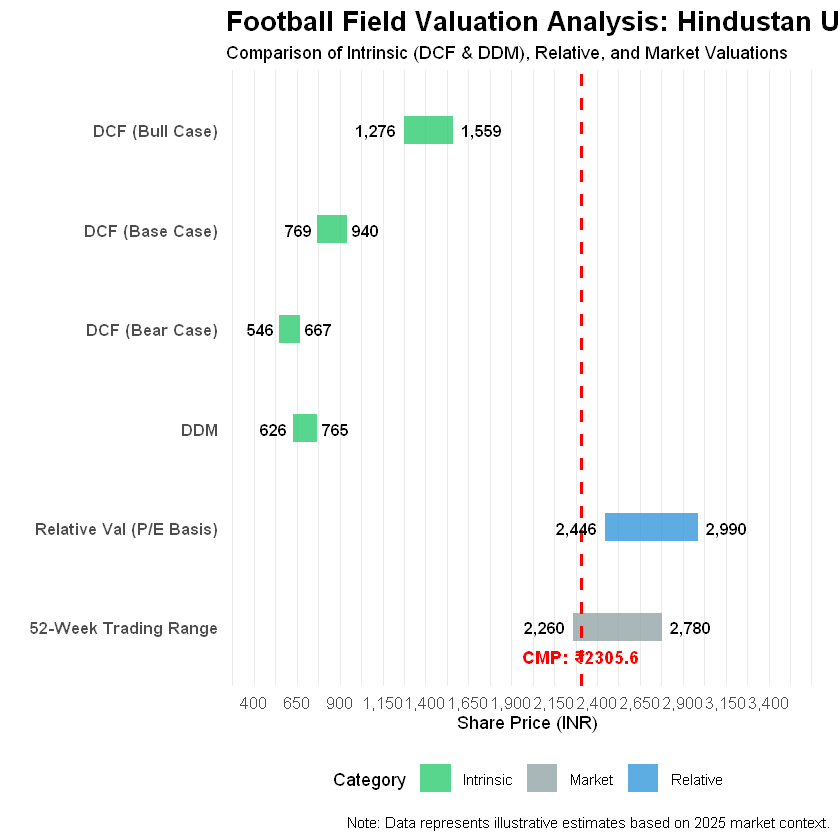

In [8]:
    # Load necessary libraries
if (!require(ggplot2)) install.packages("ggplot2")
if (!require(dplyr)) install.packages("dplyr")
if (!require(scales)) install.packages("scales")

library(ggplot2)
library(dplyr)
library(scales)

# ========================================================
# 1. INPUT DATA SECTION (EDIT THIS AREA WITH YOUR VALUES)
# ========================================================

# Current Market Price (CMP) of HUL (Approx. Market Data Dec 2025)
HUL_CMP <- 2305.60

# Create the Data Frame for Valuation Ranges
# Format: Method Name, Low Value, High Value, Category
valuation_data <- data.frame(
  Method = c("52-Week Trading Range",  
             "Relative Val (P/E Basis)", 
             "DDM", 
             "DCF (Bear Case)", 
             "DCF (Base Case)", 
             "DCF (Bull Case)"),
  
  Min = c(2260,  # 52W Low
          0.9 * 2717.90,  # Est: 45x P/E on ~45 EPS
          0.9 * 695.58, 
          0.9 * 606.7,  # Hypothetical Bear DCF
          0.9 * 854.5,  # Hypothetical Base DCF
          0.9 * 1417.4), # Hypothetical Bull DCF
  
  Max = c(2779.70,  # 52W High
          1.1 * 2717.90,  # Est: 56x P/E on ~45 EPS
          1.1 * 695.58, 
          1.1 * 606.7,  # Bear High Range
          1.1 * 854.5,  # Base High Range
          1.1 * 1417.4), # Bull High Range
  
  Category = c("Market", "Relative", "Intrinsic", "Intrinsic", "Intrinsic", "Intrinsic")
)

# Order the methods to appear correctly on the Y-axis
valuation_data$Method <- factor(valuation_data$Method, levels = valuation_data$Method)

# ========================================================
# 2. PLOTTING CODE
# ========================================================

football_field_plot <- ggplot(valuation_data, aes(y = Method)) +
  
  # A. Draw the Floating Bars (The Football Field)
  geom_segment(aes(x = Min, xend = Max, y = Method, yend = Method, color = Category), 
               size = 8, alpha = 0.8) +
  
  # B. Add the Current Market Price (CMP) Line
  geom_vline(xintercept = HUL_CMP, linetype = "dashed", color = "red", size = 1) +
  
  # C. Add Labels for Min and Max values on the bars
  geom_text(aes(x = Min, label = scales::comma(Min)), 
            color = "black", hjust = 1.2, size = 3.5, fontface = "bold") +
  geom_text(aes(x = Max, label = scales::comma(Max)), 
            color = "black", hjust = -0.2, size = 3.5, fontface = "bold") +
  
  # D. Add Annotation for CMP
  annotate("text", x = HUL_CMP, y = 0.5, label = paste0("CMP: ₹", HUL_CMP), 
           color = "red", fontface = "bold", vjust = -1) +

    scale_x_continuous(
        labels = scales::comma,       # Keeps the comma formatting (e.g., 2,000)
        limits = c(400, 3600),       # <--- THIS LINE extends the range (Min, Max)
        breaks = seq(400, 3600, 250) # Optional: Sets tick marks every 250 units
      ) +

  # E. Custom Colors and Themes
  scale_color_manual(values = c("Market" = "#95a5a6",    # Grey
                                "Relative" = "#3498db",  # Blue
                                "Intrinsic" = "#2ecc71")) + # Green
  
  theme_minimal() +
  
  labs(title = "Football Field Valuation Analysis: Hindustan Unilever (HUL)",
       subtitle = "Comparison of Intrinsic (DCF & DDM), Relative, and Market Valuations",
       x = "Share Price (INR)",
       y = "",
       caption = "Note: Data represents illustrative estimates based on 2025 market context.") +
  
  theme(legend.position = "bottom",
        plot.title = element_text(face = "bold", size = 16),
        axis.text.y = element_text(face = "bold", size = 10),
        axis.text.x = element_text(size = 10),
        panel.grid.major.y = element_blank()) # Remove horizontal grid lines for cleaner look

# ========================================================
# 3. RENDER PLOT
# ========================================================

print(football_field_plot)

# --- FIX 2: SAVE TO DEVICE ---
# Saves the last plot to your current working directory
ggsave("HUL_Football_Field.png", plot = football_field_plot, width = 10, height = 6, dpi = 300)

In [ ]:
s